# Midpoint time completeness test

Time completeness test using the APPL stock to see which are the differences of each approximation?

In [1]:
# Import modules

from pylab import *
import gzip
import pickle

%matplotlib inline

In [2]:
ticker = 'AAPL'
day = '07'

In [3]:
# Load data

print('Processing data for the stock', ticker, 'the day', day + ' March, 2016')

trade_signs = pickle.load(open('../Data/trade_signs_test%s_%s.pickl' % (day,ticker), 'rb'))
time = pickle.load(open('../Data/trade_signs_time_test%s_%s.pickl' % (day,ticker), 'rb'))

Processing data for the stock AAPL the day 07 March, 2016


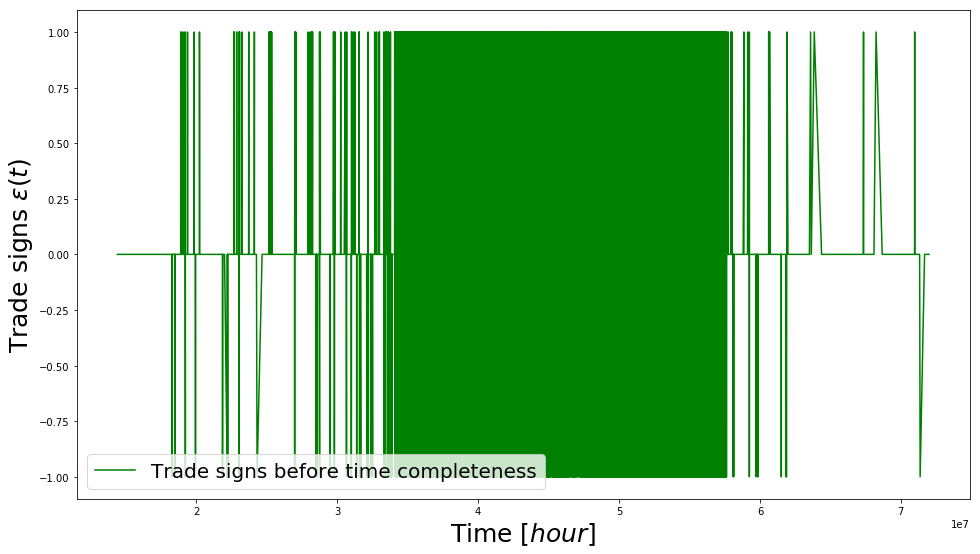

In [4]:
figure1 = figure(figsize=(16,9))
plot1 = plot(time, trade_signs, '-g', label='Trade signs before time completeness')
xlabel(r'Time $[hour]$', fontsize=25)
ylabel(r'Trade signs $ \epsilon (t) $', fontsize=25)
legend(loc='best', fontsize=20)

In [5]:
new_time = array(range(14400000,72000000))

In [6]:
trade_signs_complete_first = 0. * new_time
trade_signs_complete_last = 0. * new_time
trade_signs_complete_most = 0. * new_time

In [7]:
count = 0

for t_idx, t_val in enumerate(new_time):
    
    most = 0
    
    if (t_val == time[count]):
        
        trade_signs_complete_first[t_idx] = trade_signs[count]
        most += trade_signs[count]
        
        count += 1
        
        while (time[count - 1] == time[count]):
            
            most += trade_signs[count]
            count += 1
            
        trade_signs_complete_last[t_idx] = trade_signs[count]
        if (most > 0):
            
            trade_signs_complete_most[t_idx] = 1
            
        elif (most < 0):
            
            trade_signs_complete_most[t_idx] = -1

In [8]:
day_times_ind = (1. * time / 3600 / 1000 > 9.5) * (1. * time / 3600 / 1000 < 16) > 0 # This line behaves as an or.
                                                           # The two arrays must achieve a condition, in this case, be
                                                           # in the market trade hours
new_day_times_ind = (1. * new_time / 3600 / 1000 > 9.5) * (1. * new_time / 3600 / 1000 < 16) > 0
trade_signs = trade_signs[day_times_ind]
time = 1. * time[day_times_ind] / 3600 / 1000    # Time converted to hours in the market trade hours
new_time = new_time[new_day_times_ind] / 3600 / 1000
trade_signs_complete_first = trade_signs_complete_first[new_day_times_ind]
trade_signs_complete_last = trade_signs_complete_last[new_day_times_ind]
trade_signs_complete_most = trade_signs_complete_most[new_day_times_ind]

In [35]:
print(where(new_time > 10.99999))
print(where(new_time < 11.016))

(array([ 5399964,  5399965,  5399966, ..., 23399996, 23399997, 23399998]),)
(array([      0,       1,       2, ..., 5457596, 5457597, 5457598]),)


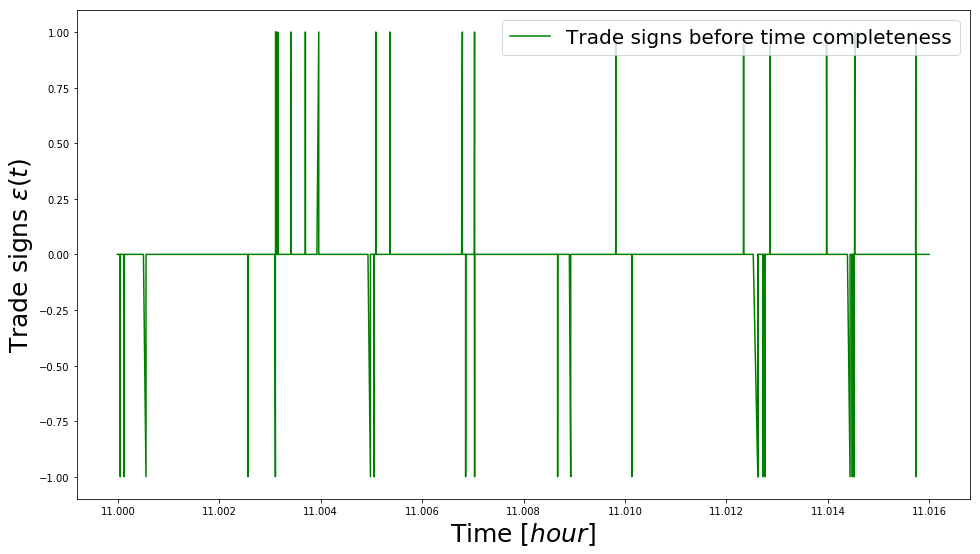

In [34]:
figure1 = figure(figsize=(16,9))
plot1 = plot(time[389896:394235], trade_signs[389896:394235], '-g', label='Trade signs before time completeness')
xlabel(r'Time $[hour]$', fontsize=25)
ylabel(r'Trade signs $ \epsilon (t) $', fontsize=25)
legend(loc='best', fontsize=20)

figure2 = figure(figsize=(16,9))
plot2 = plot(new_time, trade_signs_complete_first, '-g', label='Trade signs using first value')
xlabel(r'Time $[hour]$', fontsize=25)
ylabel(r'Trade signs $ \epsilon (t) $', fontsize=25)
legend(loc='best', fontsize=20)

figure3 = figure(figsize=(16,9))
plot3 = plot(new_time, trade_signs_complete_last, '-g', label='Trade signs using last value')
xlabel(r'Time $[hour]$', fontsize=25)
ylabel(r'Trade signs $ \epsilon (t) $', fontsize=25)
legend(loc='best', fontsize=20)

figure4 = figure(figsize=(16,9))
plot4 = plot(new_time, trade_signs_complete_most, '-g', label='Trade signs using the majority')
xlabel(r'Time $[hour]$', fontsize=25)
ylabel(r'Trade signs $ \epsilon (t) $', fontsize=25)
legend(loc='best', fontsize=20)

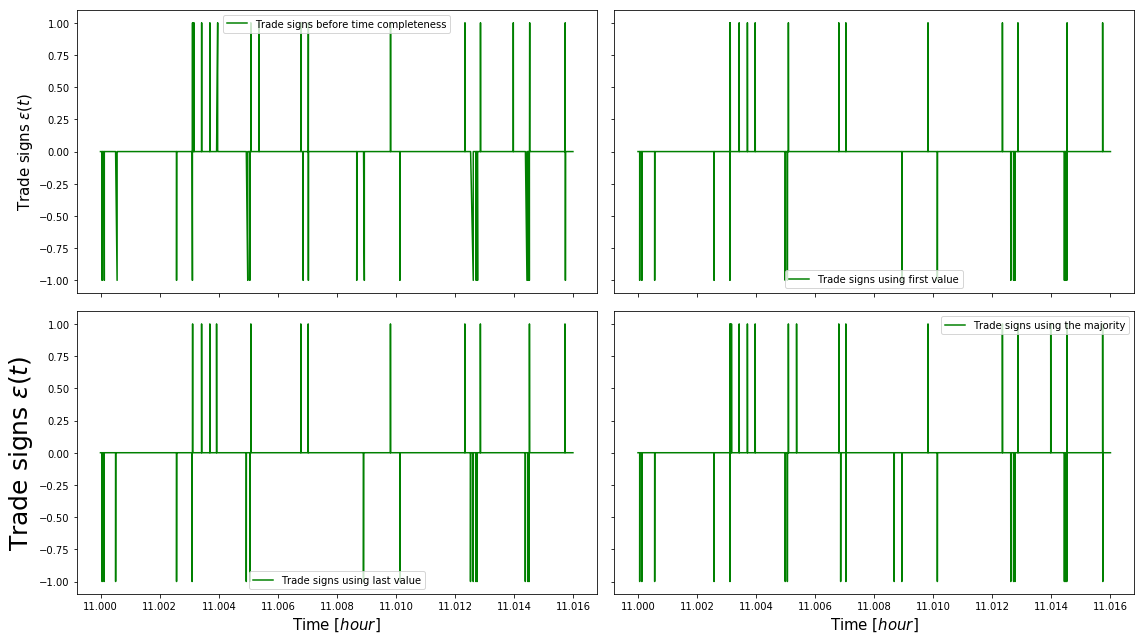

In [36]:
figure(figsize=(16,9))
subplots_adjust(hspace = 0, wspace = 0)

ax1 = subplot(221)
plot1 = plot(time[389896:394235], trade_signs[389896:394235], '-g', label='Trade signs before time completeness')
setp(ax1.get_xticklabels(), visible=False)
ylabel(r'Trade signs $ \epsilon (t) $', fontsize=15)
legend(loc='best', fontsize=10)

ax2 = subplot(222)
plot2 = plot(new_time[5399964:5457598], trade_signs_complete_first[5399964:5457598], '-g', label='Trade signs using first value')
setp(ax2.get_xticklabels(), visible = False)
setp(ax2.get_yticklabels(), visible = False)
legend(loc='best', fontsize=10)

ax3 = subplot(223)
plot3 = plot(new_time[5399964:5457598], trade_signs_complete_last[5399964:5457598], '-g', label='Trade signs using last value')
xlabel(r'Time $[hour]$', fontsize=15)
ylabel(r'Trade signs $ \epsilon (t) $', fontsize=25)
legend(loc='best', fontsize=10)

ax4 = subplot(224)
plot4 = plot(new_time[5399964:5457598], trade_signs_complete_most[5399964:5457598], '-g', label='Trade signs using the majority')
xlabel(r'Time $[hour]$', fontsize=15)
setp(ax4.get_yticklabels(), visible = False)
legend(loc='best', fontsize=10)

tight_layout()

savefig('trade_signs_time_completeness.png')